In [27]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from scipy.fft import fft
from scipy.signal import stft

In [2]:
filename = 'station21_run2730_combined.root'
file = uproot.open("./combined/" + filename)
file['combined'].keys()

['waveforms',
 'waveforms/mattak::IWaveforms',
 'waveforms/mattak::IWaveforms/TObject',
 'waveforms/mattak::IWaveforms/TObject/fUniqueID',
 'waveforms/mattak::IWaveforms/TObject/fBits',
 'waveforms/mattak::IWaveforms/run_number',
 'waveforms/mattak::IWaveforms/event_number',
 'waveforms/mattak::IWaveforms/station_number',
 'waveforms/mattak::IWaveforms/buffer_length',
 'waveforms/radiant_data[24][2048]',
 'header',
 'header/TObject',
 'header/TObject/fUniqueID',
 'header/TObject/fBits',
 'header/run_number',
 'header/event_number',
 'header/trigger_number',
 'header/station_number',
 'header/buffer_length',
 'header/pretrigger_samples',
 'header/readout_time',
 'header/pps_num',
 'header/sysclk',
 'header/sysclk_last_pps',
 'header/sysclk_last_last_pps',
 'header/trigger_time',
 'header/trigger_info',
 'header/trigger_info/trigger_info.rf_trigger',
 'header/trigger_info/trigger_info.force_trigger',
 'header/trigger_info/trigger_info.pps_trigger',
 'header/trigger_info/trigger_info.ext_

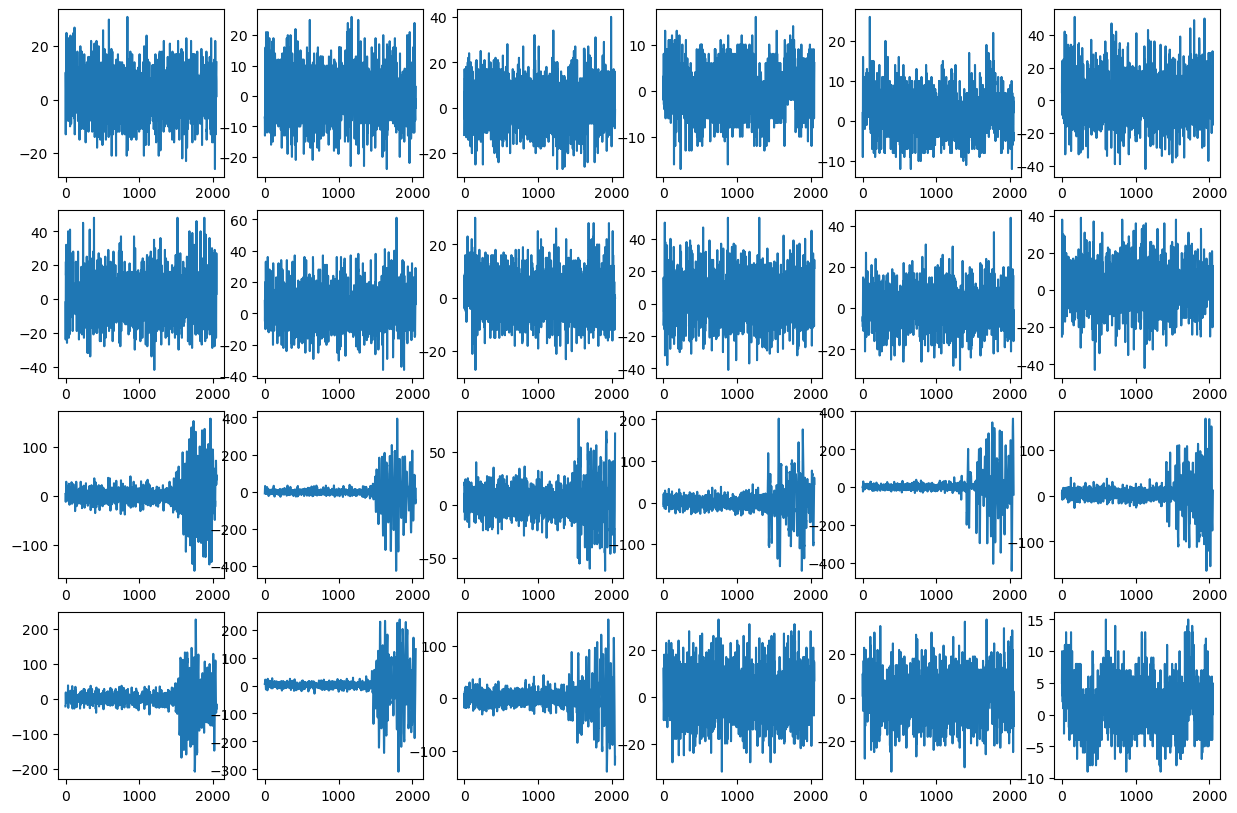

In [15]:
fmt = '%Y-%m-%d %H:%M:%S.%f'
radiant_data = np.array(file['combined/waveforms/radiant_data[24][2048]'])
#time = np.array(file['combined/header/readout_time'])
times = np.array(file['combined/header/trigger_time'])

times = pd.to_datetime(times, unit = 's')
start_time = pd.to_datetime('2023-05-12T12:40:07')
stop_time = pd.to_datetime('2023-05-12T12:46:14')

mask = (times >= start_time) & (times <= stop_time)

x = np.arange(0, 2048, 1)
#print(times.shape, radiant_data[0,0,:].shape, x.shape)
#print(radiant_data[mask, :, :].shape)

#print(times[mask])
fig, ax = plt.subplots(4, 6, figsize = (15, 10))
counter = 0
for i in range(4):
    for j in range(6):
        ax[i, j].plot(x, radiant_data[mask, :, :][5, counter, :])
        counter += 1

In [26]:
fft_signal = fft(radiant_data[mask, :, :][5, 13, :])


X, Y = np.meshgrid(x, x)



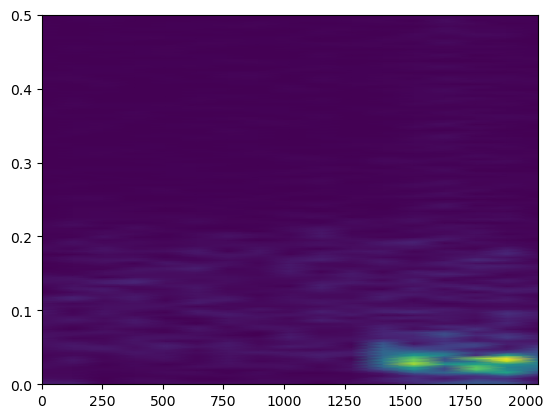

In [40]:
f, t, Zxx = stft(radiant_data[mask, :, :][5, 15, :])

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')


In [16]:
'''
import matplotlib.pyplot as plt
import numpy as np

from NuRadioReco.modules.io.rno_g import rnogDataReader
from NuRadioReco.utilities import units
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfrom NuRadioReco.modules.io.rno_g import rnogDataReader\nfrom NuRadioReco.utilities import units\n'